In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


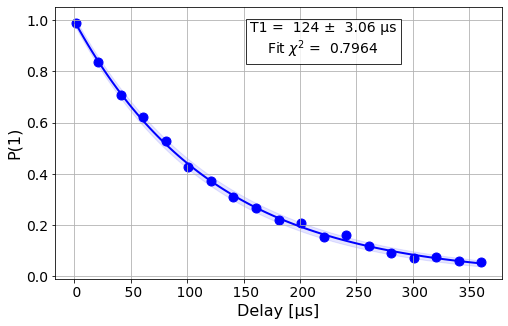

DbAnalysisResultV1
- name: @Parameters_T1Analysis
- value: [ 9.98759488e-01 -3.14470016e-03  1.23628232e-04] ± [7.52747046e-03 7.40306057e-03 3.06284685e-06]
- χ²: 0.7963649238268395
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T1
- value: 0.00012362823167899893 ± 3.0628468476889575e-06 s
- χ²: 0.7963649238268395
- quality: good
- device_components: ['Q0']
- verified: False


In [2]:
#The Diamond is coated with complex Gd complex molecules. Those Gd molecules can induce strong magnetic noise 
#which significantly reduces the NV center spin relaxation time. Those complex molecules can attach to the viral
#RNA, detach from the diamond and dissolve in the solution. This means that the effect of the magnetic noise of
#those molecules will be reduced and won't affect the relaxation time of the NV center. So when measuring that 
#relaxation time through the light emissions, we expect it to be close to the original relaxation time when viral
#RNA is present.


#with only diamond
import numpy as np
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1

# A T1 simulator
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakeVigo(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakeVigo(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
#qubit0_t1 = backend.properties().t1(0)
#print(qubit0_t1)
# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * 126e-6, 2e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(qubit=0, delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend).block_for_results()

# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)

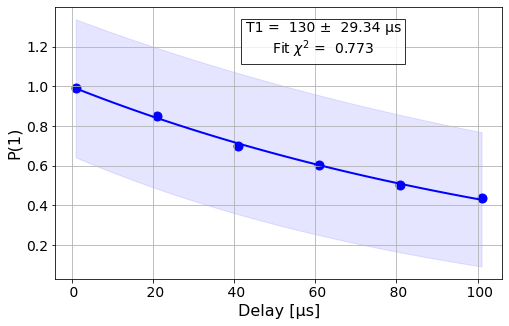

DbAnalysisResultV1
- name: @Parameters_T1Analysis
- value: [ 1.05443023e+00 -5.71221729e-02  1.29892512e-04] ± [1.73240648e-01 1.74219748e-01 2.93356441e-05]
- χ²: 0.7730301590214742
- quality: bad
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T1
- value: 0.000129892511941148 ± 2.9335644062704332e-05 s
- χ²: 0.7730301590214742
- quality: bad
- device_components: ['Q0']
- verified: False


In [3]:
#The Diamond is coated with complex Gd complex molecules. Those Gd molecules can induce strong magnetic noise 
#which significantly reduces the NV center spin relaxation time. Those complex molecules can attach to the viral
#RNA, detach from the diamond and dissolve in the solution. When the virus is not present those molecules will 
#stay on the diamond, as there is no viral RNA to attach to, and their magnetic field will significantly reduce the relaxation time of the NV spin 
#relaxation time, which we can measure through its emission. The shorter relaxation time will signal the 
#absence of the virus.

# diamond (NV) and GD molecules
import numpy as np
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1

# A T1 simulator
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakeVigo(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakeVigo(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
#qubit0_t1 = backend.properties().t1(0)
#print(qubit0_t1)
# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * 37e-6, 2e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(qubit=0, delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend).block_for_results()

# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)